# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas-docs.github.io/pandas-docs-travis/io.html#json
+ data source: http://jsonstudio.com/resources/
****

In [121]:
% matplotlib inline
import pandas as pd
import numpy as np

## imports for Python, Pandas

In [4]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas-docs.github.io/pandas-docs-travis/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [5]:
wb= pd.read_json('data/world_bank_projects.json')
wb.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [6]:
wb.columns

Index([u'_id', u'approvalfy', u'board_approval_month', u'boardapprovaldate',
       u'borrower', u'closingdate', u'country_namecode', u'countrycode',
       u'countryname', u'countryshortname', u'docty',
       u'envassesmentcategorycode', u'grantamt', u'ibrdcommamt', u'id',
       u'idacommamt', u'impagency', u'lendinginstr', u'lendinginstrtype',
       u'lendprojectcost', u'majorsector_percent', u'mjsector_namecode',
       u'mjtheme', u'mjtheme_namecode', u'mjthemecode', u'prodline',
       u'prodlinetext', u'productlinetype', u'project_abstract',
       u'project_name', u'projectdocs', u'projectfinancialtype',
       u'projectstatusdisplay', u'regionname', u'sector', u'sector1',
       u'sector2', u'sector3', u'sector4', u'sector_namecode', u'sectorcode',
       u'source', u'status', u'supplementprojectflg', u'theme1',
       u'theme_namecode', u'themecode', u'totalamt', u'totalcommamt', u'url'],
      dtype='object')

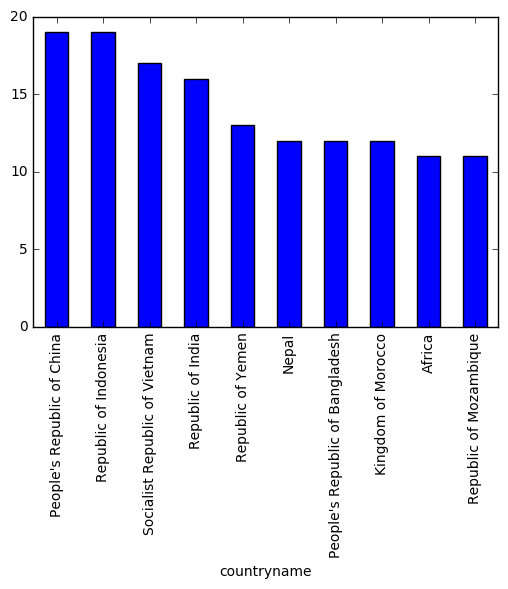

In [125]:
wb.groupby("countryname").size().sort_values(ascending=False).head(10).plot(kind="bar")

In [214]:
total=[]
for i in wb.mjthemecode:
    total.append(i.split(","))
total=[x for y in total for x in y]  #unpacks the list of lists into one list
tot=pd.Series(total) #converts it to a series
x=tot.str.extract("(\d{1,2})").dropna() #filters out the text
x.value_counts().sort_values(ascending=False).head(10) #top ten list of goal


C:\Users\Nathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

In [278]:
dic={"1":"Economic Management", "2": "Public Sector Governance", "3":"Rule of Law", "4":"Financial and Private Sector Development", "5":"Trade and integration", "6":"Social Protection and Risk Management", "7":"Social dev/gender/inclusion", "8":"Human Development", "9":"Urban Development", "10":"Rural Development", "11":"Environment and Natural Resources Management"}
#create a dic

In [303]:
wb2=wb.copy() #make a copy
themes=wb2.mjthemecode.replace(dic, regex=True) #replace numbers with themes
total=zip(wb.mjthemecode, themes) #zip the codes and the themes together
wb.mjthemecode=total #reinsert it into the dataframe
wb.mjthemecode #test that it worked

0      ((8,11, Human Development,Environment and Natu...
1      ((1,6, Economic Management,Social Protection a...
2      ((5,2,11,6, Trade and integration,Public Secto...
3      ((7,7, Social dev/gender/inclusion,Social dev/...
4      ((5,4, Trade and integration,Financial and Pri...
5      ((6,6, Social Protection and Risk Management,S...
6      ((2,4, Public Sector Governance,Financial and ...
7      ((11,8, Environment and Natural Resources Mana...
8      ((10,7, Rural Development,Social dev/gender/in...
9      ((2,2,2, Public Sector Governance,Public Secto...
10     ((10,2, Rural Development,Public Sector Govern...
11     ((10,6,6,11, Rural Development,Social Protecti...
12     ((4, Financial and Private Sector Development)...
13     ((5,11,10, Trade and integration,Environment a...
14     ((6,6,6, Social Protection and Risk Management...
15     ((10,11,5, Rural Development,Environment and N...
16     ((10,2, Rural Development,Public Sector Govern...
17     ((8,7, Human Development